# **Business Understanding** 

**Background**

In today's competitive telecommunucations industry, customer retention is critical while acquiring new customers can be upto five times more expensive than retaining existing ones making churn prevention a key strategic goal for telecom companies.The Telco Customer dataset contains information about a telecom company's customers. Analyzing this data can help identify patterns and factors that influence customer churn, enabling businesses to proactively take measures to retain at risk customers

**Problem Statement**

Despite offering various services and packages, many customers still choose to leave often without clear warning. The main objective of this project is to analyze customer data and understand the key drivers of churn and build a predictive model that can accurately predict whether the customer is likely to churn or not

**Main Objective**

To develop a machine learning model that accurately predicts whether the customer is more likely to churn or not

**Column Descriptions**

Customer ID: Unique identifier of each customer

Gender: Male or Female

Senior Citizen: If a customer is a senior citizen, Yes or No

Partner: Whether a customer has a partner, Yes or No

Dependents: Whether a customer has like children or others relying on them, Yes or No

Tenure: No of months the customer has stayed in the company.

Phone Service: Whether the customer has phone service, Yes or No.

Multiple Lines: If customer has multiple phone lines,  Yes or No.

Internet Service: Type of internet service, DSL, Fiber Optic, No

Online Security: Whether the customer has online security add on, Yes No or No Internet service   *

Online Back up: whether the customer has online back up on. Yes, No, or No interner service.

DeviceProtection: Whether the customer has device protection add-on,Yes, No, or No internet service

TechSupport: Whether the customer has tech support add-on.Yes, No, or No internet service

StreamingTV: Whether the customer streams TV.Yes, No, or No internet service

StreamingMovies: Whether the customer streams movies.Yes, No, or No internet service

Contract: Type of contract the customer has.Month-to-month, One year, or Two year

PaperlessBilling: Whether the customer receives bills electronically.Yes or No

PaymentMethod: How the customer pays.e.g., Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)

MonthlyCharges: The amount charged to the customer monthly.

TotalCharges: The total amount charged to the customer over the entire tenure.

Churn: Whether the customer left the company.
Yes = Churned
No = Still a customer

## **Importing Libraries and Warnings** #

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,cross_val_score
from imblearn.over_sampling import RandomOverSampler

## **Data Understanding**


**Data Loading**

In [2]:
df = pd.read_csv("data\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#Printing the unique values of the columns
for column in df.columns:
  print(f"{column} : {df[column].unique()}\n")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender : ['Female' 'Male']

SeniorCitizen : [0 1]

Partner : ['Yes' 'No']

Dependents : ['No' 'Yes']

tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

PhoneService : ['No' 'Yes']

MultipleLines : ['No phone service' 'No' 'Yes']

InternetService : ['DSL' 'Fiber optic' 'No']

OnlineSecurity : ['No' 'Yes' 'No internet service']

OnlineBackup : ['Yes' 'No' 'No internet service']

DeviceProtection : ['No' 'Yes' 'No internet service']

TechSupport : ['No' 'Yes' 'No internet service']

StreamingTV : ['No' 'Yes' 'No internet service']

StreamingMovies : ['No' 'Yes' 'No internet service']

Contract : ['Month-to-month' 'One year' 'Two year']

PaperlessBilling : ['Yes' 'No']

PaymentMethod : ['Electronic check' 'Maile

In [5]:
#Checking if there are any null rows
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
#Shape of the dataset
df.shape

(7043, 21)

In [8]:
#Checking if there any duplicated values
df.duplicated().sum()

np.int64(0)

## **EDA** (Exploratory Data Analysis)


In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### UNIVARIATE

**Churn**










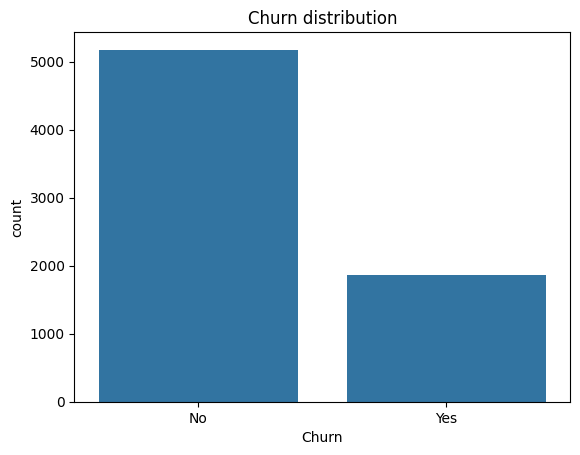

In [10]:
sns.countplot(x='Churn', data=df)
plt.title("Churn distribution")
plt.show()

The number of no churn is more than the number of customers who have churned

**Gender**

We are going to visualize the distribution of the genders in our dataset

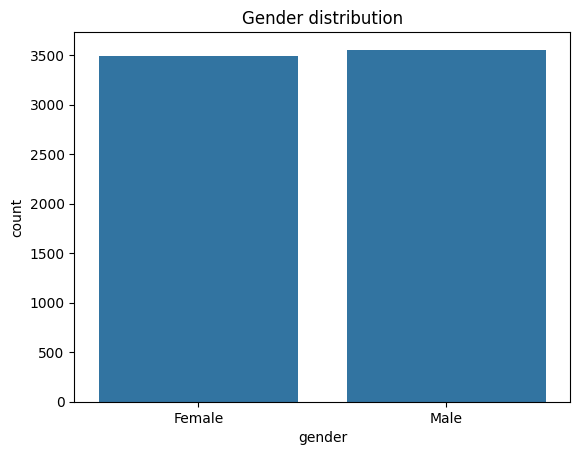

In [11]:
# plt.figure(figsize=(10,8))
sns.countplot(x='gender',data=df)
plt.title("Gender distribution")
plt.show()

**Senior Citizen**

We are going to visualize the distribution of the senior citizen in our dataframe

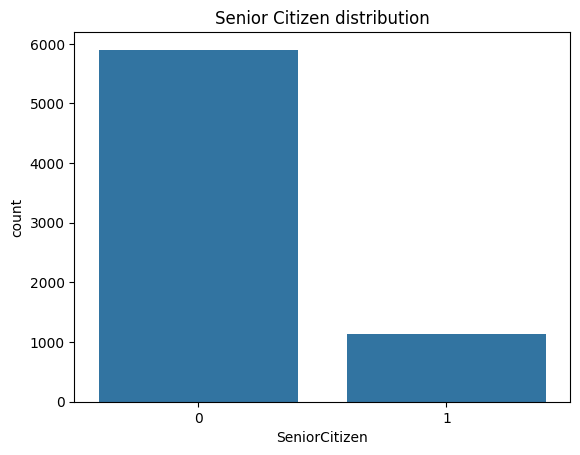

In [12]:
sns.countplot(x="SeniorCitizen", data=df)
plt.title("Senior Citizen distribution")
plt.show()

Most of the customers in our dataset are non senior

### Bivariate

**Gender vs Churn**


<Figure size 1000x800 with 0 Axes>

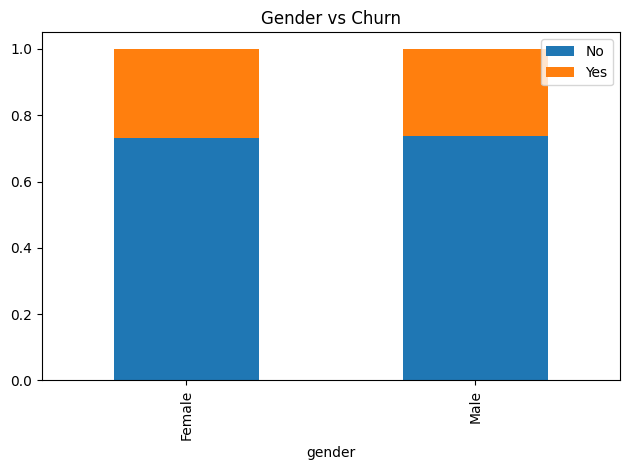

In [13]:
crosstab = pd.crosstab(df['gender'], df['Churn'], normalize='index')
plt.figure(figsize=(10,8))
crosstab.plot(kind='bar', stacked=True)
plt.title("Gender vs Churn")
plt.legend(loc='upper right',bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

There's somehow an equal distribution of the customer churn according to gender.
This implies gender does not really affect customer churn

**Senior citizen**

<Figure size 1000x800 with 0 Axes>

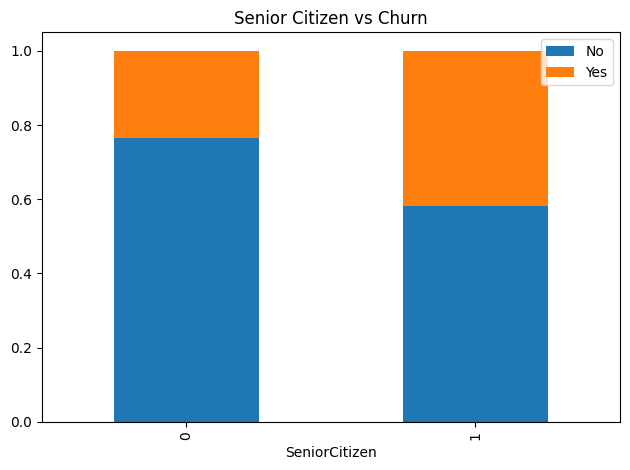

In [14]:
# plt.figure(figsize=(10,6))
# sns.countplot(x="Churn", data=df,hue='SeniorCitizen')
# plt.title("Senior Citizen Distribution")
# plt.show()

crosstab = pd.crosstab(df['SeniorCitizen'],df['Churn'],normalize='index')
plt.figure(figsize=(10,8))
crosstab.plot(kind='bar',stacked=True)
plt.title("Senior Citizen vs Churn")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

Most of the customers who churn are senior citizens.
This is also an important feature for our model.

**Partner**

<Figure size 1000x800 with 0 Axes>

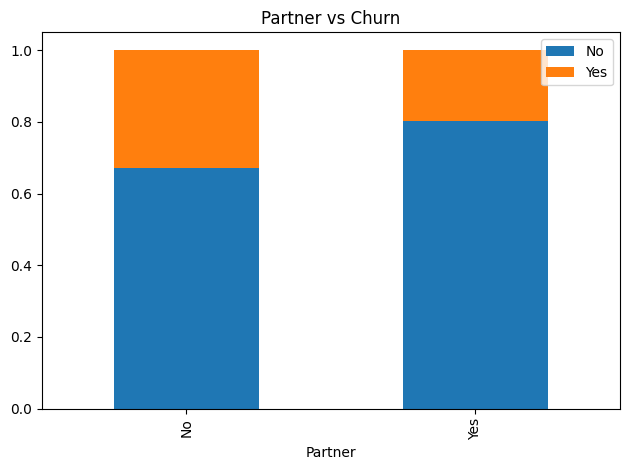

In [15]:
crosstab = pd.crosstab(df['Partner'],df['Churn'],normalize='index')
plt.figure(figsize=(10,8))
crosstab.plot(kind='bar',stacked=True)
plt.title("Partner vs Churn")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

Most of the customers who churn dont have partners

**Dependants**

<Figure size 1000x800 with 0 Axes>

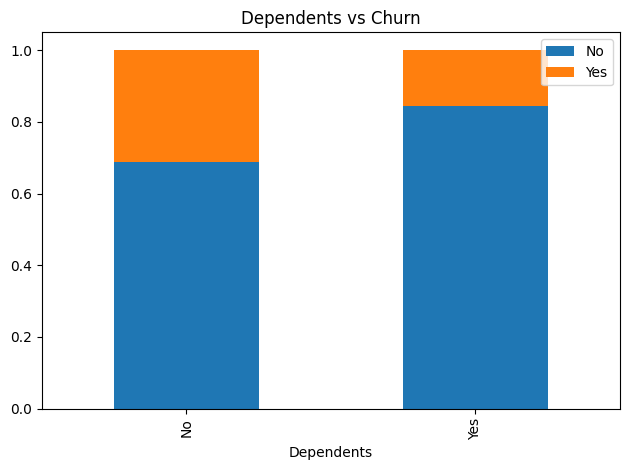

In [16]:
crosstab = pd.crosstab(df['Dependents'],df['Churn'],normalize='index')
plt.figure(figsize=(10,8))
crosstab.plot(kind='bar',stacked=True)
plt.title("Dependents vs Churn")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

Most of the customers who churn dont have dependents

**Tenure**

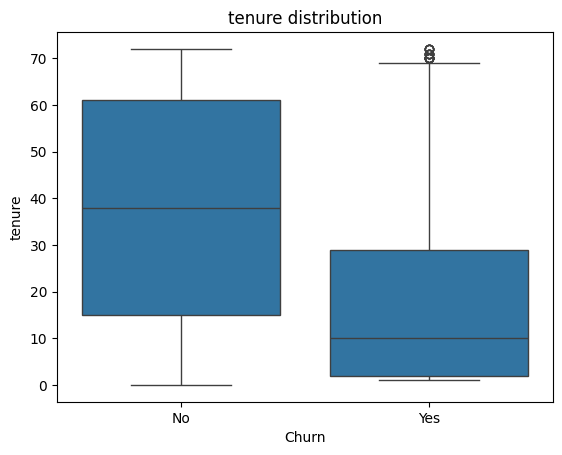

In [17]:
df['tenure'].unique()
# plt.figure(figsize=(11,10))
sns.boxplot(x='Churn',y='tenure',data=df)
plt.title("tenure distribution")
plt.show()

Customers who churn tend to have low tenure(stayed for  a short period of time)
The outliers indicate few customers with high tenure also tend to churn, but rare cases.


In [18]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**Phone Service**

<Figure size 1000x800 with 0 Axes>

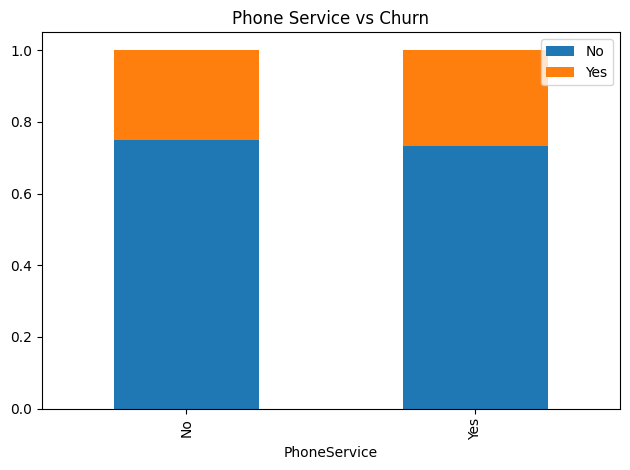

In [19]:
crosstab = pd.crosstab(df['PhoneService'],df['Churn'],normalize='index')
plt.figure(figsize=(10,8))
crosstab.plot(kind='bar',stacked=True)
plt.title("Phone Service vs Churn")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

There is an equal distribution of churn among the customers who have and who don't have a phone service

In [20]:
df.groupby("PhoneService")['Churn'].value_counts()

PhoneService  Churn
No            No        512
              Yes       170
Yes           No       4662
              Yes      1699
Name: count, dtype: int64

**MultipleLines**

In [21]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

<Figure size 1000x800 with 0 Axes>

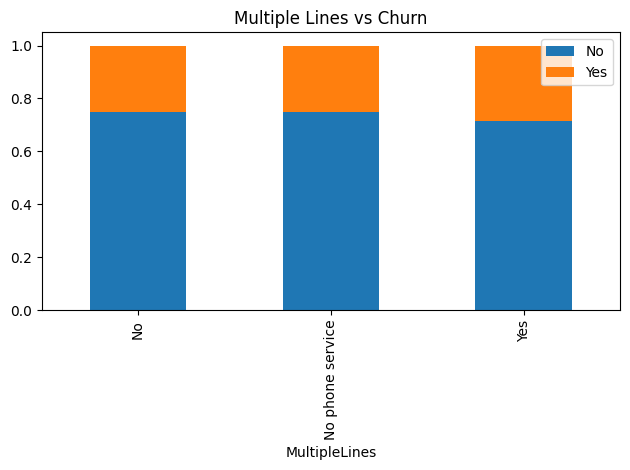

In [22]:
crosstab = pd.crosstab(df['MultipleLines'],df['Churn'],normalize='index')
plt.figure(figsize=(10,8))
crosstab.plot(kind='bar',stacked=True)
plt.title("Multiple Lines vs Churn")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

In [23]:
df.groupby('MultipleLines')['Churn'].value_counts()

MultipleLines     Churn
No                No       2541
                  Yes       849
No phone service  No        512
                  Yes       170
Yes               No       2121
                  Yes       850
Name: count, dtype: int64

Customers with mulitple lines have a slightly higher churn rate compared to the rest.

**Streaming Movies** and **Streaming Tv**

In [24]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

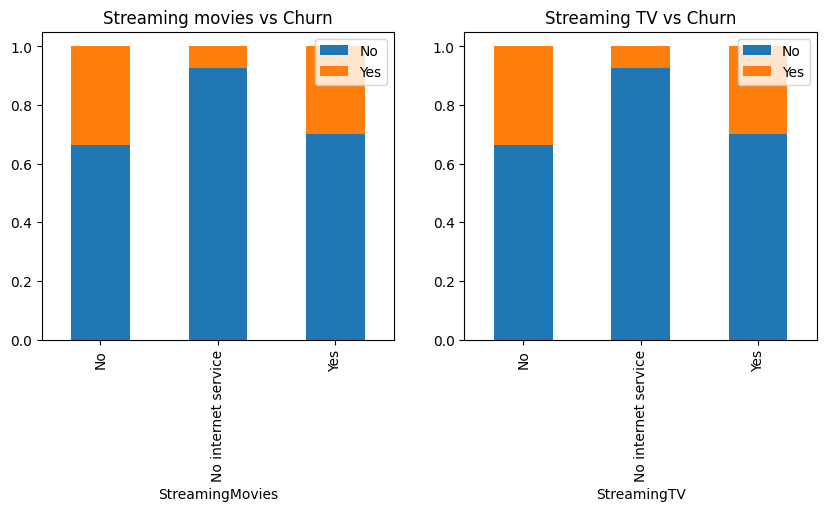

In [25]:

fig,ax = plt.subplots(1,2,figsize=(10,4))
crosstab = pd.crosstab(df['StreamingMovies'],df['Churn'],normalize='index')
crosstab.plot(kind='bar',stacked=True,ax=ax[0])
ax[0].set_title("Streaming movies vs Churn")
ax[0].legend(loc="upper right")

crosst = pd.crosstab(df['StreamingTV'],df['Churn'],normalize='index')
crosst.plot(kind='bar',stacked=True,ax=ax[1])
ax[1].set_title("Streaming TV vs Churn")
ax[1].legend(loc="upper right")


plt.show()





Customers who don't stream movies and tv have a higher churn rate.

In [26]:
df.groupby("StreamingMovies")['Churn'].value_counts()

StreamingMovies      Churn
No                   No       1847
                     Yes       938
No internet service  No       1413
                     Yes       113
Yes                  No       1914
                     Yes       818
Name: count, dtype: int64

**Internet Service**

<Figure size 1000x800 with 0 Axes>

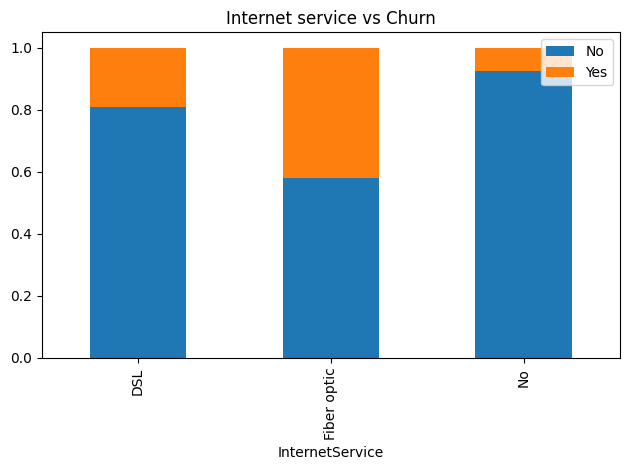

In [27]:
crosstab = pd.crosstab(df['InternetService'],df['Churn'],normalize='index')
plt.figure(figsize=(10,8))
crosstab.plot(kind="bar",stacked=True)
plt.title("Internet service vs Churn")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

Most of the customers who churn use fibre optic service provider.

In [28]:
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [29]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

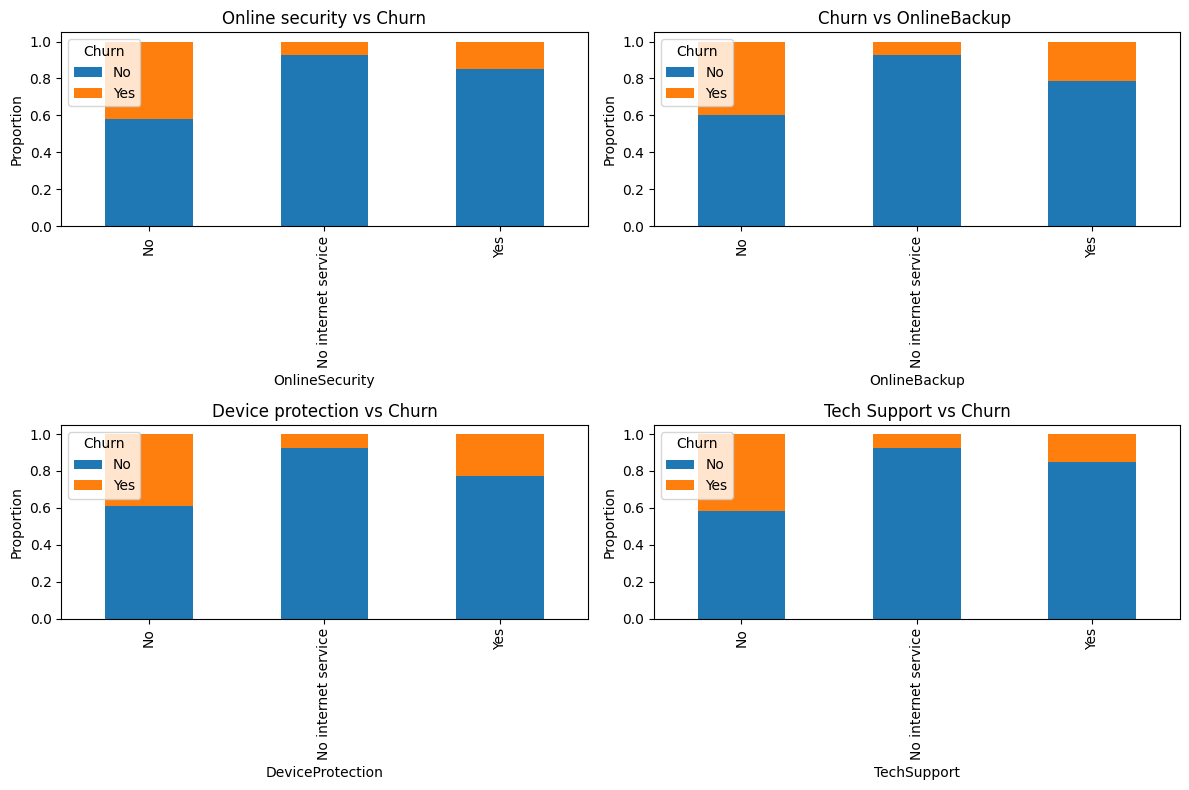

In [30]:
fig,ax = plt.subplots(2,2,figsize=(12,8))
crosstab = pd.crosstab(df['OnlineSecurity'], df['Churn'], normalize='index')
crosstab.plot(kind='bar', stacked=True,ax=ax[0,0])
ax[0,0].set_title('Online security vs Churn')
ax[0,0].set_ylabel('Proportion')

crosstab = pd.crosstab(df['OnlineBackup'], df['Churn'], normalize='index')
crosstab.plot(kind='bar', stacked=True,ax=ax[0,1])
ax[0,1].set_title('Churn vs OnlineBackup ')
ax[0,1].set_ylabel('Proportion')

crosstab = pd.crosstab(df['DeviceProtection'], df['Churn'], normalize='index')
crosstab.plot(kind='bar', stacked=True,ax=ax[1,0])
ax[1,0].set_title('Device protection vs Churn')
ax[1,0].set_ylabel('Proportion')


crosstab = pd.crosstab(df['TechSupport'], df['Churn'], normalize='index')
crosstab.plot(kind='bar', stacked=True,ax=ax[1,1])
ax[1,1].set_title('Tech Support vs Churn')
ax[1,1].set_ylabel('Proportion')

fig.tight_layout()
plt.show()

Most of the customers who churn don't have online security/device protection/tech support etc

**Contract**


In [31]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<Figure size 1000x800 with 0 Axes>

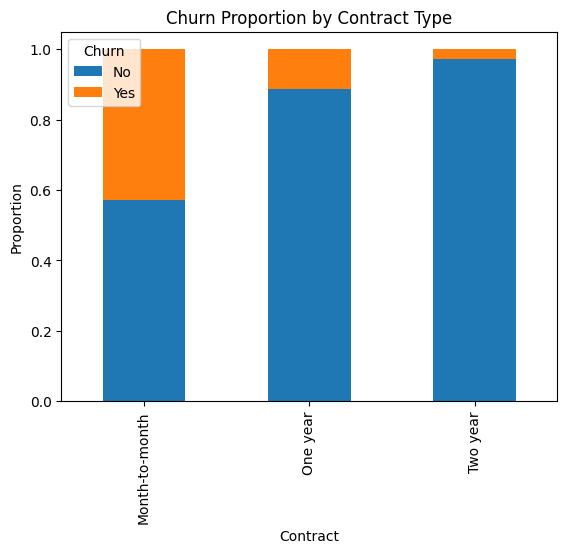

In [32]:
crosstab = pd.crosstab(df['Contract'], df['Churn'], normalize='index')
plt.figure(figsize=(10,8))
crosstab.plot(kind='bar', stacked=True)
plt.title('Churn Proportion by Contract Type')
plt.ylabel('Proportion')
plt.show()


Most of the customers who churn are under month to month contract

**Paperless Billing**

<Figure size 1000x800 with 0 Axes>

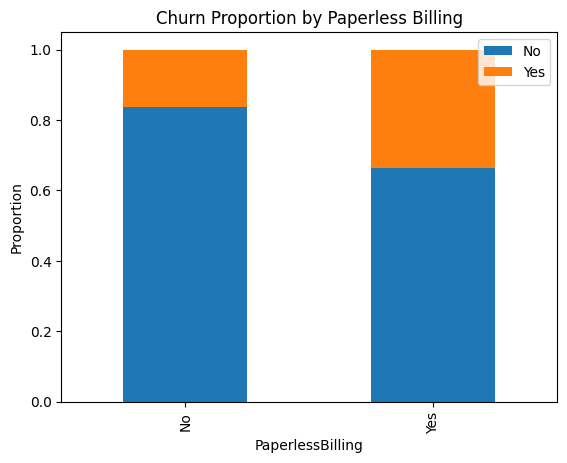

In [33]:
crosstab = pd.crosstab(df['PaperlessBilling'], df['Churn'],normalize='index')
plt.figure(figsize=(10,8))
crosstab.plot(kind='bar', stacked=True)
plt.title('Churn Proportion by Paperless Billing')
plt.ylabel('Proportion')
plt.legend(loc="upper right")
plt.show()

Most who churn, paperless billing

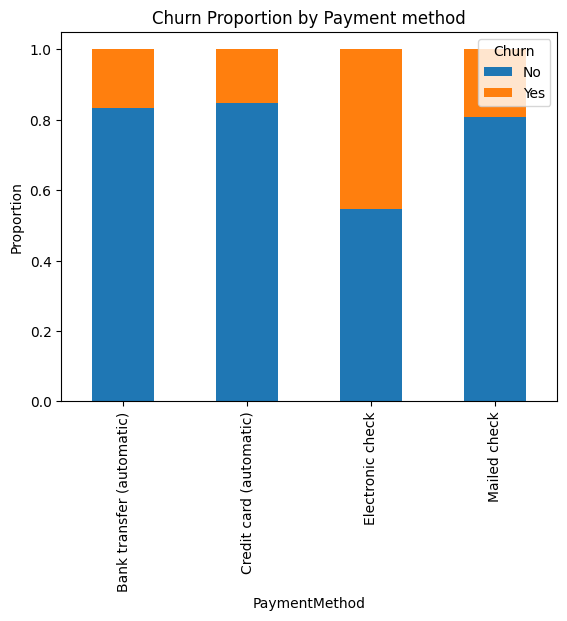

In [34]:
crosstab = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index')

crosstab.plot(kind='bar', stacked=True)
plt.title('Churn Proportion by Payment method')
plt.ylabel('Proportion')
plt.show()


Customers who churn use electronic check as a payment method

**Total Charges**

In [35]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [36]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [37]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

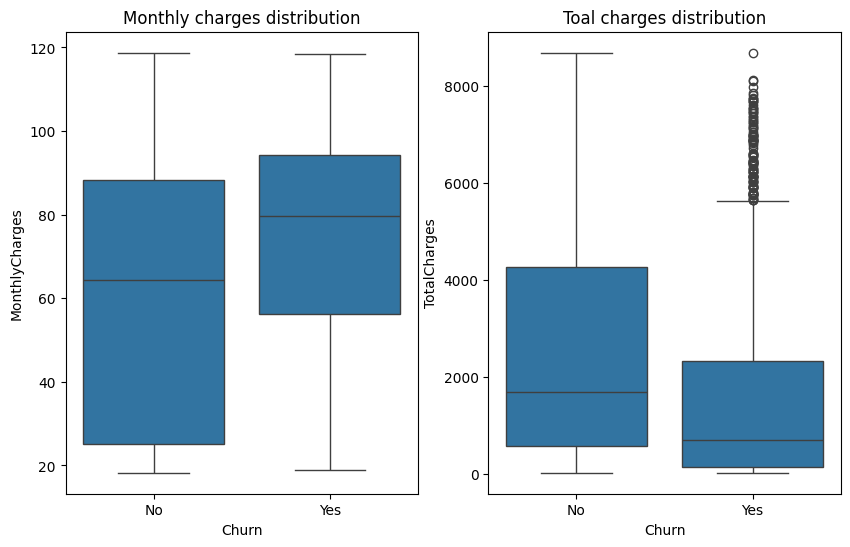

In [38]:
fig,ax = plt.subplots(1,2,figsize=(10,6))
sns.boxplot(x="Churn",y="MonthlyCharges",data=df,ax=ax[0])
ax[0].set_title("Monthly charges distribution")

sns.boxplot(x="Churn", y="TotalCharges", data=df, ax=ax[1])
ax[1].set_title("Toal charges distribution")

plt.show()

## MultiVariate

In [39]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**Gender vs Senior Citizen vs Churn**

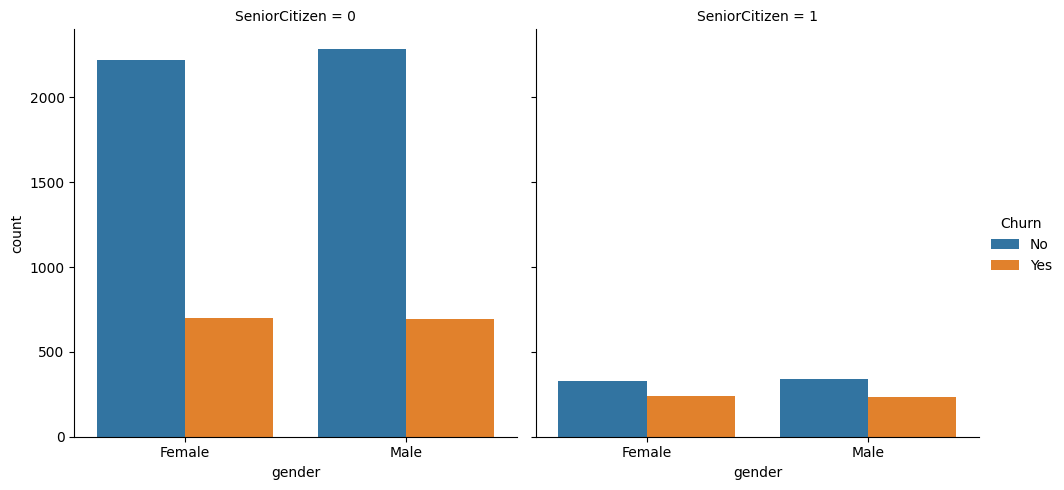

In [40]:
sns.catplot(x="gender",col="SeniorCitizen", hue='Churn',kind="count",data=df)

plt.show()

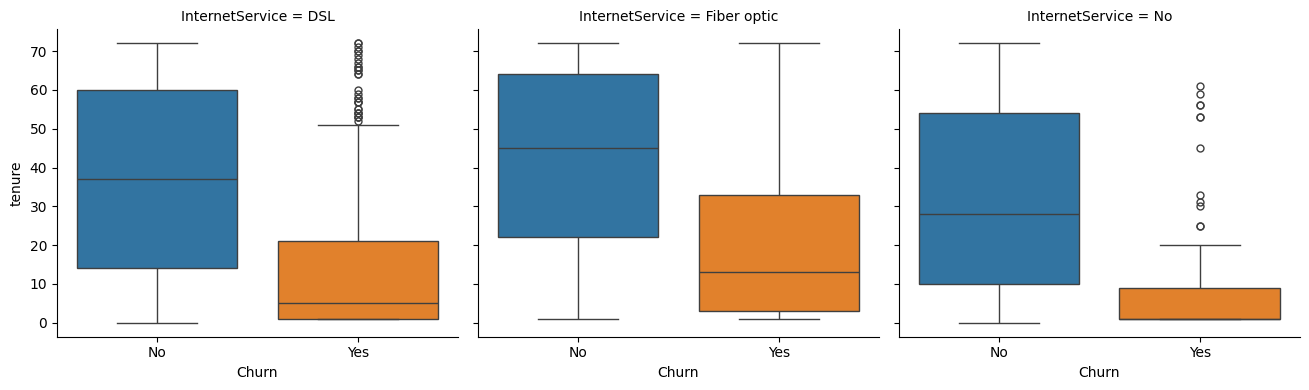

In [41]:
sns.catplot(
    data=df,
    x='Churn',
    y='tenure',
    col='InternetService',
    kind='box',
    height=4,
    hue="Churn",
    aspect=1.1
)
plt.show()

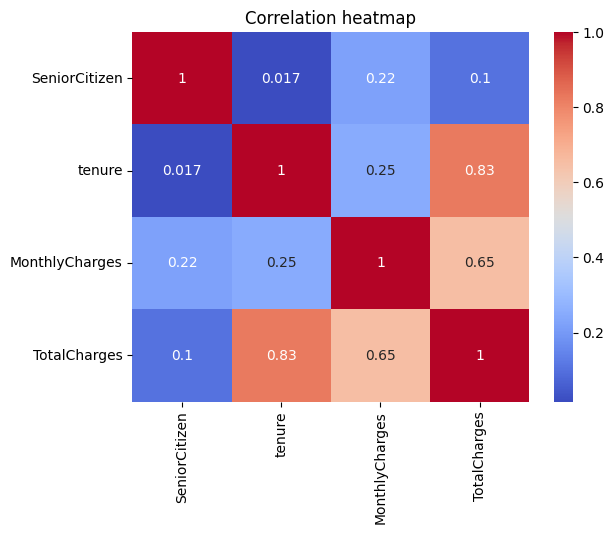

In [42]:
correlation_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title("Correlation heatmap")
plt.show()


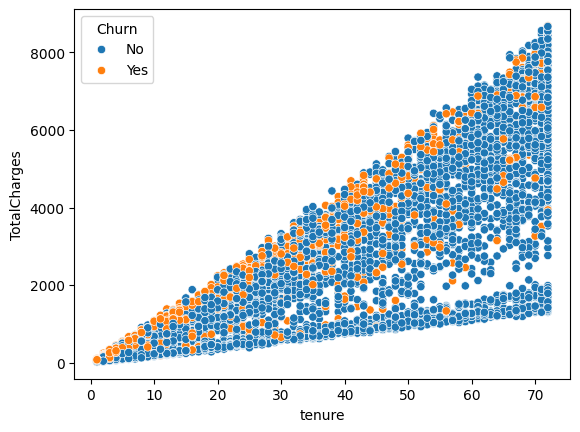

In [43]:
sns.scatterplot(x="tenure",y="TotalCharges",data=df,hue='Churn')
plt.show()


**Transforming the Categorical Columns**

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [45]:
for column in df.columns:
    print(f"{column} : {df[column].unique()}")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank tr

In [46]:
df['SeniorCitizen'].dtype

dtype('int64')

Converting Binary Categorical Columns

In [47]:

# for col in columns:
#     df[col] = df[col].map({'Yes':1,'No':0,'Male':1,'Female':0})
#     print(f"{col} ",df[col].dtype)
# df.info()
# df[["gender",'Partner','Dependents','PhoneService','PaperlessBilling','Churn']].isnull().sum()
# df['Churn'].value_counts()

columns = ["gender",'Partner','Dependents','PhoneService','PaperlessBilling','Churn']
for col in columns:
    df[col] = df[col].replace({'Yes':1,'No':0,'Male':1,'Female':0})
    df[col].astype(int)


Converting Multiclass Categorical Variables

In [48]:
columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
              'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
              'Contract', 'PaymentMethod']
df = pd.get_dummies(df,columns = columns,drop_first=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   gender                                 7043 non-null   int64  
 2   SeniorCitizen                          7043 non-null   int64  
 3   Partner                                7043 non-null   int64  
 4   Dependents                             7043 non-null   int64  
 5   tenure                                 7043 non-null   int64  
 6   PhoneService                           7043 non-null   int64  
 7   PaperlessBilling                       7043 non-null   int64  
 8   MonthlyCharges                         7043 non-null   float64
 9   TotalCharges                           7032 non-null   float64
 10  Churn                                  7043 non-null   int64  
 11  Mult

# **Training our model**

We are going to split our dataset and then impute missing values in the total charges column using the mean

In [56]:
from sklearn.impute import SimpleImputer

x = df.drop(columns=['Churn','customerID','gender','PhoneService','MultipleLines_Yes','MultipleLines_No phone service'])
y = df["Churn"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
total_ch_train = x_train[['TotalCharges']]
total_ch_test = x_test[['TotalCharges']]
num_imputer = SimpleImputer(strategy = 'median')
total_ch_train_imputed = num_imputer.fit_transform(total_ch_train)
total_ch_test_imputed = num_imputer.transform(total_ch_test)

x_train.loc[:, 'TotalCharges'] = total_ch_train_imputed
x_test.loc[:, 'TotalCharges'] = total_ch_test_imputed



In [76]:
print(y_train.value_counts())


Churn
0    4138
1    1496
Name: count, dtype: int64


In [78]:
ros = RandomOverSampler()
x_train_resampled,y_train_resampled = ros.fit_resample(x_train,y_train)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_resampled,y_train_resampled = smote.fit_resample(x_train,y_train)


In [ ]:
# print(y_train_resampled.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


In [ ]:
# print(y_test.value_counts())

Churn
0    1036
1     373
Name: count, dtype: int64


# KNN

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
knn = KNeighborsClassifier()
param_grid = {'n_neighbors':np.arange(1,50)}
cv = GridSearchCV(knn,param_grid = param_grid,cv=5)
cv.fit(x_train,y_train)
y_pred = cv.predict(x_test)

print("Best parameters",cv.best_params_)



Best parameters {'n_neighbors': np.int64(21)}


In [ ]:
print("Best score",cv.best_score_)

Best score 0.7841664552144126


In [ ]:
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors = 21)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
cv_scores = cross_val_score(knn,x_train, y_train, cv=5, scoring='accuracy')
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

Accuracy 0.7920511000709723
Mean CV Accuracy: 0.7842


In [ ]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.79      0.95      0.86      1036
           1       0.69      0.29      0.41       373

    accuracy                           0.78      1409
   macro avg       0.74      0.62      0.64      1409
weighted avg       0.76      0.78      0.74      1409



In [ ]:
print(confusion_matrix(y_test,y_pred))

[[988  48]
 [264 109]]


Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.linear_model import Ridge


kf = KFold(n_splits = 5,shuffle=True,random_state=42)
param_grid = {"alpha":np.arange(0.0001,1,0.1),
              "solver":['sag',"lsqr"]}
ridge = Ridge()
ridge_cv = GridSearchCV(ridge,param_grid,cv=kf)
ridge_cv.fit(x_train,y_train)
print(ridge_cv.best_params_,ridge_cv.best_score_)


{'alpha': np.float64(0.0001), 'solver': 'sag'} 0.2166265779521807


# Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42,class_weight='balanced')
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
print("accuracy_score",accuracy_score(y_test,y_pred))
cv_scores = cross_val_score(rfc,x_train, y_train, cv=5, scoring='accuracy')
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

accuracy_score 0.7920511000709723
Mean CV Accuracy: 0.7902


# XGBoost

In [70]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42,use_label_encoder = False,eval_metric='logloss')
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
print("accuracy score",accuracy_score(y_test,y_pred))
cv_scores = cross_val_score(xgb,x_train, y_train, cv=5, scoring='accuracy')
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")



accuracy score 0.7856635911994322
Mean CV Accuracy: 0.7835


In [ ]:
cv_scores = cross_val_score(knn,x_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

Mean CV Accuracy: 0.7565


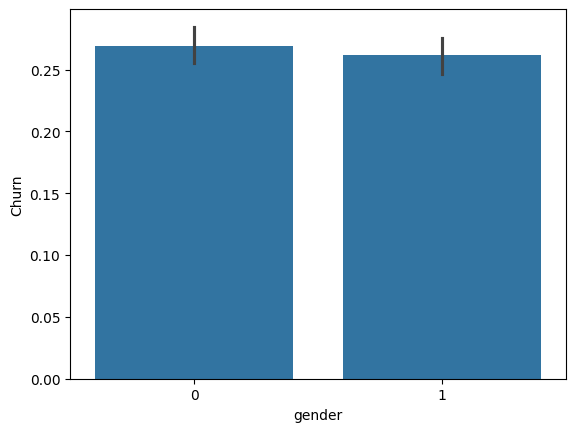

In [ ]:
sns.barplot(data=df,x=df['gender'],y=df['Churn'])
plt.show()

# Naive Bayes

In [71]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
y_pred = nb_model.predict(x_test)


In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.59      0.72      1036
           1       0.44      0.89      0.59       373

    accuracy                           0.67      1409
   macro avg       0.69      0.74      0.65      1409
weighted avg       0.81      0.67      0.69      1409



# Logreg

In [68]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.74      1409
weighted avg       0.81      0.81      0.81      1409



# SVM

In [65]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)


In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1036
           1       0.00      0.00      0.00       373

    accuracy                           0.74      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.74      0.62      1409



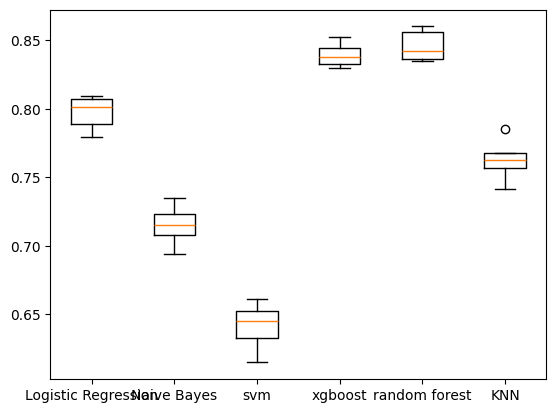

In [87]:
from sklearn.model_selection import GridSearchCV,KFold

models = {"Logistic Regression": LogisticRegression(),"Naive Bayes":GaussianNB(),"svm":SVC(),"xgboost": XGBClassifier(random_state=42,use_label_encoder = False,eval_metric='logloss'),
          "random forest":RandomForestClassifier(random_state=42,class_weight='balanced'),
          "KNN":KNeighborsClassifier()}
results = []

for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model,x_train_resampled,y_train_resampled,cv=kf)
    results.append(cv_results)

plt.boxplot(results, labels=models.keys())
plt.show()

In [81]:
train_score = model.score(x_train, y_train)
print("Training Accuracy:", train_score)


Training Accuracy: 0.8264110756123536


In [86]:
for name, model in models.items():
    model.fit(x_train,y_train)
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test,y_test)
    print("\n{} Train set accuracy: {}".format(name,train_score))
    print("{} Test set accuracy: {}".format(name,test_score))


Logistic Regression Train set accuracy: 0.7992545260915868
Logistic Regression Test set accuracy: 0.8140525195173882

Naive Bayes Train set accuracy: 0.6574369897053604
Naive Bayes Test set accuracy: 0.6671398154719659

svm Train set accuracy: 0.7344692935747249
svm Test set accuracy: 0.7352732434350603

xgboost Train set accuracy: 0.9279375221867234
xgboost Test set accuracy: 0.7856635911994322

random forest Train set accuracy: 0.997515086971956
random forest Test set accuracy: 0.7920511000709723

KNN Train set accuracy: 0.8264110756123536
KNN Test set accuracy: 0.7821149751596878


### **Our best model is Logistic Regression with an accuracy of 0.80**